In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

9it [00:00, 84.50it/s]

20it [00:00, 89.23it/s]

32it [00:00, 94.75it/s]

44it [00:00, 99.49it/s]

55it [00:00, 101.85it/s]

67it [00:00, 104.79it/s]

79it [00:00, 106.50it/s]

91it [00:00, 108.42it/s]

103it [00:00, 109.48it/s]

115it [00:01, 110.37it/s]

127it [00:01, 110.80it/s]

138it [00:01, 107.39it/s]

149it [00:01, 106.11it/s]

161it [00:01, 108.14it/s]

172it [00:01, 106.31it/s]

184it [00:01, 108.54it/s]

195it [00:01, 101.41it/s]

206it [00:01, 98.07it/s] 

216it [00:02, 95.19it/s]

226it [00:02, 95.19it/s]

237it [00:02, 98.33it/s]

247it [00:02, 98.56it/s]

259it [00:02, 103.06it/s]

270it [00:02, 104.23it/s]

281it [00:02, 96.31it/s] 

291it [00:02, 88.47it/s]

302it [00:02, 93.10it/s]

314it [00:03, 98.55it/s]

325it [00:03, 100.70it/s]

336it [00:03, 100.70it/s]

347it [00:03, 102.70it/s]

358it [00:03, 103.86it/s]

369it [00:03, 103.35it/s]

380it [00:03, 103.89it/s]

391it [00:03, 103.05it/s]

402it [00:03, 102.40it/s]

413it [00:04, 102.02it/s]

424it [00:04, 102.82it/s]

435it [00:04, 103.70it/s]

446it [00:04, 104.41it/s]

458it [00:04, 106.72it/s]

470it [00:04, 108.64it/s]

482it [00:04, 109.44it/s]

494it [00:04, 110.18it/s]

506it [00:04, 105.63it/s]

517it [00:05, 92.58it/s] 

527it [00:05, 87.77it/s]

537it [00:05, 84.29it/s]

546it [00:05, 82.67it/s]

555it [00:05, 81.18it/s]

564it [00:05, 81.49it/s]

574it [00:05, 85.73it/s]

586it [00:05, 92.54it/s]

598it [00:05, 97.41it/s]

609it [00:06, 98.68it/s]

621it [00:06, 102.14it/s]

633it [00:06, 105.44it/s]

645it [00:06, 106.91it/s]

656it [00:06, 107.77it/s]

667it [00:06, 102.36it/s]

679it [00:06, 105.14it/s]

690it [00:06, 104.45it/s]

702it [00:06, 106.41it/s]

713it [00:07, 103.40it/s]

725it [00:07, 106.49it/s]

737it [00:07, 108.42it/s]

748it [00:07, 103.39it/s]

759it [00:07, 102.35it/s]

771it [00:07, 105.57it/s]

783it [00:07, 107.83it/s]

795it [00:07, 108.81it/s]

807it [00:07, 110.35it/s]

819it [00:07, 112.04it/s]

831it [00:08, 112.64it/s]

843it [00:08, 112.22it/s]

855it [00:08, 111.76it/s]

867it [00:08, 112.75it/s]

879it [00:08, 112.82it/s]

891it [00:08, 112.05it/s]

903it [00:08, 111.48it/s]

915it [00:08, 110.80it/s]

927it [00:08, 110.92it/s]

939it [00:09, 110.91it/s]

951it [00:09, 111.27it/s]

963it [00:09, 111.16it/s]

975it [00:09, 109.97it/s]

987it [00:09, 104.50it/s]

998it [00:09, 88.49it/s] 

1008it [00:09, 75.97it/s]

1017it [00:09, 77.58it/s]

1029it [00:10, 85.81it/s]

1041it [00:10, 92.25it/s]

1051it [00:10, 93.88it/s]

1061it [00:10, 95.36it/s]

1073it [00:10, 100.23it/s]

1084it [00:10, 100.88it/s]

1095it [00:10, 90.71it/s] 

1105it [00:10, 92.69it/s]

1115it [00:10, 86.38it/s]

1127it [00:11, 92.52it/s]

1139it [00:11, 98.01it/s]

1151it [00:11, 102.80it/s]

1163it [00:11, 106.36it/s]

1175it [00:11, 108.97it/s]

1187it [00:11, 110.77it/s]

1199it [00:11, 110.69it/s]

1211it [00:11, 108.51it/s]

1223it [00:11, 110.69it/s]

1235it [00:12, 111.56it/s]

1247it [00:12, 112.26it/s]

1259it [00:12, 112.74it/s]

1271it [00:12, 112.50it/s]

1283it [00:12, 106.72it/s]

1294it [00:12, 103.31it/s]

1305it [00:12, 95.77it/s] 

1315it [00:12, 88.96it/s]

1325it [00:13, 83.60it/s]

1334it [00:13, 81.22it/s]

1343it [00:13, 79.57it/s]

1353it [00:13, 83.18it/s]

1365it [00:13, 90.47it/s]

1376it [00:13, 95.53it/s]

1388it [00:13, 99.59it/s]

1400it [00:13, 102.80it/s]

1412it [00:13, 105.84it/s]

1424it [00:14, 107.31it/s]

1436it [00:14, 108.45it/s]

1447it [00:14, 99.68it/s] 

1459it [00:14, 103.44it/s]

1471it [00:14, 106.41it/s]

1483it [00:14, 108.31it/s]

1495it [00:14, 107.83it/s]

1506it [00:14, 103.24it/s]

1517it [00:14, 100.33it/s]

1529it [00:15, 104.15it/s]

1540it [00:15, 96.94it/s] 

1552it [00:15, 100.80it/s]

1564it [00:15, 104.46it/s]

1576it [00:15, 107.25it/s]

1588it [00:15, 109.22it/s]

1600it [00:15, 107.02it/s]

1612it [00:15, 108.62it/s]

1624it [00:15, 109.37it/s]

1636it [00:16, 110.04it/s]

1648it [00:16, 102.61it/s]

1659it [00:16, 103.38it/s]

1671it [00:16, 105.49it/s]

1682it [00:16, 106.04it/s]

1693it [00:16, 107.19it/s]

1704it [00:16, 107.72it/s]

1716it [00:16, 109.55it/s]

1727it [00:16, 101.37it/s]

1739it [00:16, 104.05it/s]

1750it [00:17, 102.90it/s]

1762it [00:17, 105.49it/s]

1773it [00:17, 104.66it/s]

1784it [00:17, 103.93it/s]

1795it [00:17, 100.79it/s]

1806it [00:17, 100.27it/s]

1817it [00:17, 101.62it/s]

1828it [00:17, 100.88it/s]

1840it [00:17, 104.12it/s]

1851it [00:18, 104.35it/s]

1862it [00:18, 103.50it/s]

1873it [00:18, 102.30it/s]

1884it [00:18, 102.37it/s]

1895it [00:18, 99.83it/s] 

1907it [00:18, 102.69it/s]

1919it [00:18, 105.44it/s]

1931it [00:18, 107.31it/s]

1943it [00:18, 109.37it/s]

1955it [00:19, 110.75it/s]

1967it [00:19, 111.38it/s]

1979it [00:19, 102.69it/s]

1991it [00:19, 105.97it/s]

2003it [00:19, 108.42it/s]

2015it [00:19, 109.33it/s]

2027it [00:19, 109.73it/s]

2039it [00:19, 110.34it/s]

2051it [00:19, 107.00it/s]

2063it [00:20, 108.30it/s]

2074it [00:20, 106.42it/s]

2086it [00:20, 108.56it/s]

2098it [00:20, 109.91it/s]

2110it [00:20, 110.03it/s]

2122it [00:20, 110.87it/s]

2134it [00:20, 107.96it/s]

2146it [00:20, 109.95it/s]

2158it [00:20, 111.30it/s]

2170it [00:21, 112.67it/s]

2182it [00:21, 112.54it/s]

2194it [00:21, 113.21it/s]

2206it [00:21, 105.52it/s]

2218it [00:21, 107.71it/s]

2230it [00:21, 108.93it/s]

2241it [00:21, 108.93it/s]

2252it [00:21, 92.47it/s] 

2262it [00:21, 87.37it/s]

2272it [00:22, 89.68it/s]

2283it [00:22, 93.02it/s]

2293it [00:22, 93.90it/s]

2303it [00:22, 84.61it/s]

2314it [00:22, 88.71it/s]

2324it [00:22, 81.20it/s]

2333it [00:22, 78.60it/s]

2342it [00:22, 80.56it/s]

2353it [00:23, 86.35it/s]

2365it [00:23, 93.02it/s]

2377it [00:23, 98.57it/s]

2389it [00:23, 102.68it/s]

2401it [00:23, 106.52it/s]

2413it [00:23, 108.35it/s]

2424it [00:23, 108.63it/s]

2436it [00:23, 109.13it/s]

2448it [00:23, 109.89it/s]

2460it [00:23, 109.58it/s]

2471it [00:24, 108.22it/s]

2482it [00:24, 105.62it/s]

2493it [00:24, 102.75it/s]

2504it [00:24, 102.67it/s]

2515it [00:24, 98.37it/s] 

2527it [00:24, 101.83it/s]

2539it [00:24, 104.00it/s]

2551it [00:24, 106.78it/s]

2563it [00:24, 108.32it/s]

2575it [00:25, 109.23it/s]

2586it [00:25, 106.24it/s]

2598it [00:25, 107.60it/s]

2610it [00:25, 109.49it/s]

2622it [00:25, 110.27it/s]

2634it [00:25, 111.33it/s]

2646it [00:25, 111.58it/s]

2658it [00:25, 112.25it/s]

2670it [00:25, 112.73it/s]

2682it [00:26, 113.05it/s]

2694it [00:26, 112.17it/s]

2706it [00:26, 112.84it/s]

2718it [00:26, 112.37it/s]

2730it [00:26, 112.81it/s]

2742it [00:26, 109.85it/s]

2754it [00:26, 92.80it/s] 

2764it [00:26, 94.66it/s]

2776it [00:26, 98.97it/s]

2787it [00:27, 99.55it/s]

2799it [00:27, 102.80it/s]

2811it [00:27, 105.02it/s]

2823it [00:27, 107.34it/s]

2835it [00:27, 108.90it/s]

2847it [00:27, 107.24it/s]

2858it [00:27, 96.34it/s] 

2869it [00:27, 99.63it/s]

2880it [00:27, 102.12it/s]

2891it [00:28, 102.68it/s]

2902it [00:28, 103.08it/s]

2914it [00:28, 105.30it/s]

2925it [00:28, 106.04it/s]

2937it [00:28, 107.50it/s]

2948it [00:28, 107.36it/s]

2959it [00:28, 107.42it/s]

2970it [00:28, 107.20it/s]

2981it [00:28, 107.71it/s]

2993it [00:29, 109.11it/s]

3004it [00:29, 107.15it/s]

3015it [00:29, 107.00it/s]

3026it [00:29, 107.76it/s]

3038it [00:29, 108.98it/s]

3049it [00:29, 108.98it/s]

3061it [00:29, 109.45it/s]

3073it [00:29, 110.37it/s]

3085it [00:29, 110.29it/s]

3097it [00:29, 110.49it/s]

3109it [00:30, 110.58it/s]

3121it [00:30, 93.09it/s] 

3131it [00:30, 82.68it/s]

3140it [00:30, 77.44it/s]

3150it [00:30, 82.67it/s]

3162it [00:30, 89.82it/s]

3174it [00:30, 95.65it/s]

3185it [00:30, 97.92it/s]

3196it [00:31, 100.78it/s]

3208it [00:31, 103.48it/s]

3220it [00:31, 106.16it/s]

3232it [00:31, 108.59it/s]

3244it [00:31, 110.79it/s]

3256it [00:31, 111.26it/s]

3268it [00:31, 111.72it/s]

3280it [00:31, 112.04it/s]

3292it [00:31, 107.95it/s]

3304it [00:32, 109.75it/s]

3316it [00:32, 111.21it/s]

3328it [00:32, 111.42it/s]

3340it [00:32, 111.60it/s]

3352it [00:32, 112.23it/s]

3364it [00:32, 112.60it/s]

3376it [00:32, 95.61it/s] 

3387it [00:32, 87.39it/s]

3397it [00:32, 88.89it/s]

3409it [00:33, 94.60it/s]

3421it [00:33, 98.96it/s]

3433it [00:33, 102.66it/s]

3444it [00:33, 104.66it/s]

3455it [00:33, 106.14it/s]

3466it [00:33, 106.39it/s]

3477it [00:33, 103.90it/s]

3489it [00:33, 106.53it/s]

3501it [00:33, 107.95it/s]

3512it [00:34, 108.35it/s]

3523it [00:34, 108.61it/s]

3535it [00:34, 109.72it/s]

3547it [00:34, 110.29it/s]

3559it [00:34, 110.65it/s]

3571it [00:34, 107.86it/s]

3583it [00:34, 109.11it/s]

3595it [00:34, 110.24it/s]

3607it [00:34, 110.74it/s]

3619it [00:34, 112.23it/s]

3631it [00:35, 112.84it/s]

3643it [00:35, 113.09it/s]

3655it [00:35, 111.68it/s]

3667it [00:35, 112.08it/s]

3679it [00:35, 110.61it/s]

3691it [00:35, 100.09it/s]

3703it [00:35, 103.82it/s]

3715it [00:35, 106.45it/s]

3727it [00:35, 109.04it/s]

3739it [00:36, 103.65it/s]

3751it [00:36, 106.11it/s]

3763it [00:36, 109.15it/s]

3775it [00:36, 97.69it/s] 

3786it [00:36, 100.67it/s]

3797it [00:36, 97.96it/s] 

3807it [00:36, 94.85it/s]

3819it [00:36, 99.14it/s]

3830it [00:37, 99.00it/s]

3841it [00:37, 101.23it/s]

3852it [00:37, 101.78it/s]

3864it [00:37, 104.64it/s]

3876it [00:37, 106.79it/s]

3887it [00:37, 107.41it/s]

3898it [00:37, 107.97it/s]

3909it [00:37, 104.05it/s]

3921it [00:37, 105.96it/s]

3932it [00:37, 107.03it/s]

3944it [00:38, 108.45it/s]

3956it [00:38, 109.62it/s]

3967it [00:38, 109.38it/s]

3978it [00:38, 108.25it/s]

3990it [00:38, 108.81it/s]

4001it [00:38, 107.61it/s]

4012it [00:38, 107.66it/s]

4024it [00:38, 108.69it/s]

4035it [00:38, 108.73it/s]

4047it [00:39, 109.75it/s]

4058it [00:39, 108.61it/s]

4069it [00:39, 108.22it/s]

4080it [00:39, 108.15it/s]

4091it [00:39, 108.13it/s]

4102it [00:39, 97.84it/s] 

4113it [00:39, 99.64it/s]

4124it [00:39, 101.89it/s]

4136it [00:39, 104.56it/s]

4148it [00:40, 106.91it/s]

4159it [00:40, 105.25it/s]

4170it [00:40, 105.89it/s]

4182it [00:40, 108.13it/s]

4193it [00:40, 106.59it/s]

4204it [00:40, 107.45it/s]

4215it [00:40, 107.86it/s]

4227it [00:40, 109.35it/s]

4239it [00:40, 109.74it/s]

4251it [00:40, 110.04it/s]

4263it [00:41, 109.65it/s]

4274it [00:41, 108.64it/s]

4286it [00:41, 109.37it/s]

4298it [00:41, 109.70it/s]

4309it [00:41, 109.36it/s]

4320it [00:41, 108.67it/s]

4332it [00:41, 109.61it/s]

4344it [00:41, 110.59it/s]

4356it [00:41, 110.20it/s]

4368it [00:42, 95.47it/s] 

4378it [00:42, 86.69it/s]

4388it [00:42, 82.55it/s]

4397it [00:42, 82.85it/s]

4406it [00:42, 81.37it/s]

4416it [00:42, 85.87it/s]

4425it [00:42, 78.27it/s]

4437it [00:42, 86.07it/s]

4449it [00:43, 92.49it/s]

4461it [00:43, 97.15it/s]

4472it [00:43, 94.90it/s]

4484it [00:43, 99.38it/s]

4496it [00:43, 103.07it/s]

4508it [00:43, 105.50it/s]

4520it [00:43, 107.61it/s]

4532it [00:43, 109.20it/s]

4544it [00:43, 110.37it/s]

4556it [00:44, 111.48it/s]

4568it [00:44, 111.64it/s]

4580it [00:44, 112.13it/s]

4592it [00:44, 111.53it/s]

4604it [00:44, 111.52it/s]

4616it [00:44, 109.97it/s]

4628it [00:44, 110.09it/s]

4640it [00:44, 110.18it/s]

4652it [00:44, 110.21it/s]

4664it [00:44, 110.83it/s]

4676it [00:45, 110.51it/s]

4688it [00:45, 110.45it/s]

4700it [00:45, 92.53it/s] 

4710it [00:45, 94.07it/s]

4722it [00:45, 98.55it/s]

4734it [00:45, 102.48it/s]

4746it [00:45, 103.79it/s]

4758it [00:45, 105.97it/s]

4770it [00:46, 107.74it/s]

4782it [00:46, 109.14it/s]

4794it [00:46, 110.58it/s]

4806it [00:46, 110.96it/s]

4818it [00:46, 111.39it/s]

4830it [00:46, 111.86it/s]

4842it [00:46, 111.46it/s]

4854it [00:46, 111.19it/s]

4866it [00:46, 111.18it/s]

4878it [00:46, 111.75it/s]

4890it [00:47, 111.63it/s]

4902it [00:47, 111.21it/s]

4914it [00:47, 109.65it/s]

4925it [00:47, 108.45it/s]

4936it [00:47, 108.00it/s]

4947it [00:47, 107.48it/s]

4958it [00:47, 106.30it/s]

4969it [00:47, 103.12it/s]

4980it [00:48, 89.56it/s] 

4991it [00:48, 93.05it/s]

5002it [00:48, 97.52it/s]

5012it [00:48, 71.78it/s]

5024it [00:48, 80.55it/s]

5036it [00:48, 88.24it/s]

5048it [00:48, 94.04it/s]

5060it [00:48, 98.54it/s]

5072it [00:48, 102.27it/s]

5084it [00:49, 105.60it/s]

5096it [00:49, 107.50it/s]

5108it [00:49, 107.99it/s]

5120it [00:49, 109.37it/s]

5132it [00:49, 111.18it/s]

5144it [00:49, 112.10it/s]

5156it [00:49, 111.57it/s]

5168it [00:49, 112.13it/s]

5180it [00:49, 102.04it/s]

5191it [00:50, 100.78it/s]

5202it [00:50, 99.37it/s] 

5213it [00:50, 101.39it/s]

5225it [00:50, 104.59it/s]

5237it [00:50, 107.46it/s]

5249it [00:50, 108.72it/s]

5261it [00:50, 110.51it/s]

5273it [00:50, 111.53it/s]

5285it [00:50, 112.99it/s]

5297it [00:51, 113.86it/s]

5309it [00:51, 114.12it/s]

5321it [00:51, 113.33it/s]

5333it [00:51, 112.57it/s]

5345it [00:51, 110.41it/s]

5357it [00:51, 111.38it/s]

5369it [00:51, 100.40it/s]

5380it [00:51, 99.17it/s] 

5392it [00:51, 102.62it/s]

5404it [00:52, 105.20it/s]

5416it [00:52, 107.32it/s]

5428it [00:52, 109.63it/s]

5440it [00:52, 111.48it/s]

5452it [00:52, 112.47it/s]

5464it [00:52, 112.65it/s]

5476it [00:52, 106.06it/s]

5487it [00:52, 102.76it/s]

5498it [00:52, 102.52it/s]

5509it [00:53, 100.85it/s]

5520it [00:53, 99.11it/s] 

5532it [00:53, 102.80it/s]

5543it [00:53, 102.45it/s]

5554it [00:53, 92.23it/s] 

5564it [00:53, 86.26it/s]

5573it [00:53, 81.85it/s]

5583it [00:53, 85.61it/s]

5593it [00:53, 89.21it/s]

5605it [00:54, 95.44it/s]

5617it [00:54, 100.89it/s]

5629it [00:54, 103.74it/s]

5641it [00:54, 106.86it/s]

5653it [00:54, 108.84it/s]

5665it [00:54, 110.72it/s]

5677it [00:54, 89.06it/s] 

5688it [00:54, 92.98it/s]

5698it [00:55, 93.91it/s]

5709it [00:55, 97.42it/s]

5720it [00:55, 100.24it/s]

5732it [00:55, 103.84it/s]

5743it [00:55, 105.59it/s]

5754it [00:55, 105.40it/s]

5766it [00:55, 107.35it/s]

5778it [00:55, 108.25it/s]

5790it [00:55, 109.39it/s]

5802it [00:55, 110.93it/s]

5814it [00:56, 112.03it/s]

5826it [00:56, 103.87it/s]

5837it [00:56, 100.11it/s]

5849it [00:56, 103.55it/s]

5861it [00:56, 106.60it/s]

5872it [00:56, 103.48it/s]

5883it [00:56, 102.67it/s]

5894it [00:56, 102.29it/s]

5905it [00:56, 101.00it/s]

5916it [00:57, 100.31it/s]

5927it [00:57, 102.86it/s]

5939it [00:57, 105.82it/s]

5951it [00:57, 107.64it/s]

5962it [00:57, 104.63it/s]

5973it [00:57, 103.95it/s]

5984it [00:57, 104.67it/s]

5995it [00:57, 98.40it/s] 

6007it [00:57, 102.01it/s]

6019it [00:58, 104.87it/s]

6030it [00:58, 101.42it/s]

6041it [00:58, 101.67it/s]

6052it [00:58, 98.70it/s] 

6062it [00:58, 94.01it/s]

6072it [00:58, 92.05it/s]

6083it [00:58, 95.48it/s]

6093it [00:58, 96.04it/s]

6103it [00:58, 95.13it/s]

6113it [00:59, 88.67it/s]

6122it [00:59, 83.66it/s]

6131it [00:59, 81.97it/s]

6141it [00:59, 85.64it/s]

6153it [00:59, 92.90it/s]

6165it [00:59, 97.85it/s]

6177it [00:59, 101.70it/s]

6188it [00:59, 103.31it/s]

6199it [00:59, 104.48it/s]

6210it [01:00, 92.37it/s] 

6221it [01:00, 95.74it/s]

6233it [01:00, 100.56it/s]

6245it [01:00, 104.38it/s]

6257it [01:00, 106.62it/s]

6268it [01:00, 106.05it/s]

6279it [01:00, 99.50it/s] 

6290it [01:00, 96.47it/s]

6301it [01:00, 98.20it/s]

6313it [01:01, 102.19it/s]

6325it [01:01, 105.68it/s]

6336it [01:01, 103.83it/s]

6348it [01:01, 106.34it/s]

6359it [01:01, 99.37it/s] 

6370it [01:01, 100.86it/s]

6381it [01:01, 101.28it/s]

6392it [01:01, 102.00it/s]

6403it [01:02, 91.04it/s] 

6413it [01:02, 87.97it/s]

6423it [01:02, 90.12it/s]

6435it [01:02, 95.57it/s]

6446it [01:02, 97.63it/s]

6458it [01:02, 101.63it/s]

6470it [01:02, 104.57it/s]

6482it [01:02, 107.29it/s]

6493it [01:02, 96.79it/s] 

6503it [01:03, 88.42it/s]

6513it [01:03, 84.06it/s]

6523it [01:03, 88.15it/s]

6535it [01:03, 94.21it/s]

6547it [01:03, 99.19it/s]

6559it [01:03, 102.74it/s]

6571it [01:03, 105.50it/s]

6583it [01:03, 107.72it/s]

6594it [01:03, 108.33it/s]

6606it [01:04, 109.34it/s]

6618it [01:04, 109.67it/s]

6630it [01:04, 110.01it/s]

6642it [01:04, 95.93it/s] 

6652it [01:04, 94.20it/s]

6664it [01:04, 98.72it/s]

6675it [01:04, 101.56it/s]

6686it [01:04, 103.42it/s]

6698it [01:04, 105.62it/s]

6709it [01:05, 103.71it/s]

6721it [01:05, 106.15it/s]

6732it [01:05, 98.19it/s] 

6742it [01:05, 94.94it/s]

6754it [01:05, 98.98it/s]

6766it [01:05, 101.92it/s]

6778it [01:05, 105.02it/s]

6790it [01:05, 106.66it/s]

6801it [01:05, 107.06it/s]

6812it [01:06, 105.90it/s]

6824it [01:06, 107.65it/s]

6835it [01:06, 98.53it/s] 

6846it [01:06, 96.35it/s]

6856it [01:06, 95.22it/s]

6867it [01:06, 96.85it/s]

6877it [01:06, 95.70it/s]

6887it [01:06, 96.08it/s]

6899it [01:06, 100.62it/s]

6911it [01:07, 103.70it/s]

6923it [01:07, 106.79it/s]

6935it [01:07, 108.85it/s]

6947it [01:07, 109.91it/s]

6959it [01:07, 105.98it/s]

6971it [01:07, 107.80it/s]

6983it [01:07, 108.93it/s]

6995it [01:07, 109.64it/s]

7006it [01:07, 107.32it/s]

7017it [01:08, 92.60it/s] 

7027it [01:08, 86.20it/s]

7036it [01:08, 83.47it/s]

7045it [01:08, 81.16it/s]

7054it [01:08, 82.92it/s]

7066it [01:08, 90.21it/s]

7077it [01:08, 94.58it/s]

7089it [01:08, 98.79it/s]

7100it [01:08, 100.74it/s]

7111it [01:09, 103.09it/s]

7123it [01:09, 105.63it/s]

7135it [01:09, 107.02it/s]

7146it [01:09, 107.84it/s]

7157it [01:09, 108.40it/s]

7169it [01:09, 109.04it/s]

7180it [01:09, 94.20it/s] 

7190it [01:09, 86.75it/s]

7201it [01:09, 90.23it/s]

7211it [01:10, 90.12it/s]

7221it [01:10, 88.68it/s]

7232it [01:10, 93.17it/s]

7243it [01:10, 96.39it/s]

7254it [01:10, 98.54it/s]

7264it [01:10, 97.69it/s]

7276it [01:10, 101.41it/s]

7288it [01:10, 103.90it/s]

7300it [01:10, 106.21it/s]

7311it [01:11, 106.87it/s]

7323it [01:11, 108.49it/s]

7335it [01:11, 110.00it/s]

7347it [01:11, 111.30it/s]

7359it [01:11, 108.99it/s]

7371it [01:11, 109.97it/s]

7383it [01:11, 111.06it/s]

7395it [01:11, 111.83it/s]

7407it [01:11, 111.55it/s]

7419it [01:12, 111.67it/s]

7431it [01:12, 110.36it/s]

7443it [01:12, 110.64it/s]

7455it [01:12, 105.71it/s]

7466it [01:12, 93.72it/s] 

7477it [01:12, 96.79it/s]

7489it [01:12, 100.84it/s]

7501it [01:12, 104.18it/s]

7512it [01:12, 98.34it/s] 

7523it [01:13, 99.52it/s]

7535it [01:13, 103.44it/s]

7546it [01:13, 104.61it/s]

7558it [01:13, 106.51it/s]

7569it [01:13, 107.43it/s]

7581it [01:13, 109.89it/s]

7593it [01:13, 109.64it/s]

7605it [01:13, 111.01it/s]

7617it [01:13, 111.56it/s]

7629it [01:14, 112.23it/s]

7641it [01:14, 106.08it/s]

7652it [01:14, 105.86it/s]

7663it [01:14, 104.55it/s]

7674it [01:14, 104.46it/s]

7685it [01:14, 104.92it/s]

7696it [01:14, 104.27it/s]

7708it [01:14, 106.11it/s]

7720it [01:14, 108.54it/s]

7731it [01:15, 95.57it/s] 

7741it [01:15, 92.90it/s]

7752it [01:15, 97.41it/s]

7764it [01:15, 101.69it/s]

7775it [01:15, 100.82it/s]

7787it [01:15, 103.93it/s]

7799it [01:15, 105.91it/s]

7811it [01:15, 107.91it/s]

7822it [01:15, 93.42it/s] 

7834it [01:16, 99.21it/s]

7846it [01:16, 103.07it/s]

7858it [01:16, 106.11it/s]

7870it [01:16, 108.80it/s]

7882it [01:16, 105.23it/s]

7894it [01:16, 107.44it/s]

7905it [01:16, 104.26it/s]

7916it [01:16, 91.47it/s] 

7927it [01:16, 95.02it/s]

7937it [01:17, 93.39it/s]

7948it [01:17, 97.05it/s]

7959it [01:17, 99.83it/s]

7971it [01:17, 103.70it/s]

7983it [01:17, 105.75it/s]

7994it [01:17, 89.50it/s] 

8005it [01:17, 94.51it/s]

8017it [01:17, 99.01it/s]

8028it [01:17, 101.83it/s]

8039it [01:18, 99.41it/s] 

8050it [01:18, 102.32it/s]

8061it [01:18, 104.28it/s]

8072it [01:18, 98.90it/s] 

8083it [01:18, 88.76it/s]

8094it [01:18, 93.24it/s]

8105it [01:18, 96.75it/s]

8115it [01:18, 96.35it/s]

8126it [01:18, 99.40it/s]

8137it [01:19, 94.94it/s]

8149it [01:19, 99.94it/s]

8161it [01:19, 104.22it/s]

8173it [01:19, 106.45it/s]

8184it [01:19, 102.72it/s]

8195it [01:19, 100.21it/s]

8207it [01:19, 103.11it/s]

8218it [01:19, 104.41it/s]

8229it [01:19, 100.60it/s]

8240it [01:20, 96.91it/s] 

8250it [01:20, 90.29it/s]

8261it [01:20, 95.35it/s]

8273it [01:20, 100.01it/s]

8285it [01:20, 102.95it/s]

8297it [01:20, 105.37it/s]

8308it [01:20, 103.60it/s]

8320it [01:20, 106.02it/s]

8332it [01:20, 107.87it/s]

8343it [01:21, 108.48it/s]

8354it [01:21, 107.26it/s]

8365it [01:21, 104.78it/s]

8376it [01:21, 104.90it/s]

8387it [01:21, 106.08it/s]

8398it [01:21, 106.43it/s]

8409it [01:21, 107.41it/s]

8420it [01:21, 101.89it/s]

8431it [01:21, 98.63it/s] 

8442it [01:22, 99.57it/s]

8454it [01:22, 103.07it/s]

8466it [01:22, 105.79it/s]

8478it [01:22, 108.06it/s]

8489it [01:22, 106.90it/s]

8501it [01:22, 108.47it/s]

8513it [01:22, 109.52it/s]

8525it [01:22, 110.83it/s]

8537it [01:22, 111.68it/s]

8549it [01:23, 109.62it/s]

8560it [01:23, 107.64it/s]

8571it [01:23, 102.53it/s]

8583it [01:23, 104.85it/s]

8595it [01:23, 107.07it/s]

8607it [01:23, 110.02it/s]

8619it [01:23, 110.30it/s]

8631it [01:23, 111.90it/s]

8643it [01:23, 112.54it/s]

8655it [01:23, 113.31it/s]

8667it [01:24, 113.48it/s]

8679it [01:24, 113.87it/s]

8691it [01:24, 113.56it/s]

8703it [01:24, 112.73it/s]

8715it [01:24, 112.72it/s]

8727it [01:24, 111.71it/s]

8739it [01:24, 102.50it/s]

8751it [01:24, 105.30it/s]

8763it [01:24, 107.34it/s]

8775it [01:25, 109.14it/s]

8787it [01:25, 110.00it/s]

8799it [01:25, 110.90it/s]

8811it [01:25, 102.23it/s]

8822it [01:25, 98.51it/s] 

8833it [01:25, 101.69it/s]

8845it [01:25, 104.56it/s]

8857it [01:25, 106.87it/s]

8868it [01:25, 107.58it/s]

8880it [01:26, 109.40it/s]

8892it [01:26, 110.54it/s]

8904it [01:26, 111.61it/s]

8916it [01:26, 111.55it/s]

8928it [01:26, 111.81it/s]

8940it [01:26, 111.91it/s]

8952it [01:26, 95.57it/s] 

8962it [01:26, 93.94it/s]

8972it [01:26, 95.51it/s]

8983it [01:27, 97.87it/s]

8994it [01:27, 101.09it/s]

9005it [01:27, 101.54it/s]

9016it [01:27, 103.53it/s]

9028it [01:27, 106.13it/s]

9040it [01:27, 107.99it/s]

9052it [01:27, 109.69it/s]

9064it [01:27, 111.55it/s]

9076it [01:27, 112.09it/s]

9088it [01:28, 112.97it/s]

9100it [01:28, 107.07it/s]

9111it [01:28, 94.42it/s] 

9121it [01:28, 95.83it/s]

9132it [01:28, 99.45it/s]

9143it [01:28, 102.22it/s]

9155it [01:28, 104.72it/s]

9167it [01:28, 107.82it/s]

9179it [01:28, 109.66it/s]

9191it [01:29, 110.19it/s]

9203it [01:29, 109.00it/s]

9215it [01:29, 110.19it/s]

9227it [01:29, 104.26it/s]

9239it [01:29, 106.79it/s]

9250it [01:29, 102.84it/s]

9261it [01:29, 103.72it/s]

9272it [01:29, 104.55it/s]

9283it [01:29, 104.14it/s]

9294it [01:30, 103.08it/s]

9305it [01:30, 103.08it/s]

9316it [01:30, 89.21it/s] 

9326it [01:30, 84.31it/s]

9335it [01:30, 83.19it/s]

9347it [01:30, 90.54it/s]

9358it [01:30, 95.50it/s]

9370it [01:30, 100.09it/s]

9382it [01:30, 103.81it/s]

9393it [01:31, 103.31it/s]

9405it [01:31, 106.79it/s]

9417it [01:31, 109.11it/s]

9429it [01:31, 110.05it/s]

9441it [01:31, 111.26it/s]

9453it [01:31, 111.40it/s]

9465it [01:31, 111.70it/s]

9477it [01:31, 110.95it/s]

9489it [01:31, 111.67it/s]

9501it [01:32, 105.36it/s]

9512it [01:32, 104.50it/s]

9524it [01:32, 107.07it/s]

9536it [01:32, 109.18it/s]

9548it [01:32, 111.28it/s]

9560it [01:32, 110.34it/s]

9572it [01:32, 110.21it/s]

9584it [01:32, 110.65it/s]

9596it [01:32, 109.00it/s]

9607it [01:33, 108.26it/s]

9618it [01:33, 101.96it/s]

9629it [01:33, 99.47it/s] 

9641it [01:33, 103.29it/s]

9653it [01:33, 105.89it/s]

9665it [01:33, 108.17it/s]

9676it [01:33, 108.31it/s]

9687it [01:33, 108.17it/s]

9698it [01:33, 108.60it/s]

9710it [01:33, 109.48it/s]

9721it [01:34, 109.54it/s]

9732it [01:34, 109.42it/s]

9744it [01:34, 110.36it/s]

9756it [01:34, 109.33it/s]

9768it [01:34, 109.99it/s]

9780it [01:34, 110.10it/s]

9792it [01:34, 110.37it/s]

9804it [01:34, 110.36it/s]

9816it [01:34, 108.77it/s]

9828it [01:35, 109.99it/s]

9840it [01:35, 108.85it/s]

9851it [01:35, 106.02it/s]

9863it [01:35, 108.41it/s]

9874it [01:35, 106.50it/s]

9885it [01:35, 102.77it/s]

9897it [01:35, 105.95it/s]

9909it [01:35, 107.64it/s]

9921it [01:35, 109.55it/s]

9933it [01:36, 110.90it/s]

9945it [01:36, 111.29it/s]

9957it [01:36, 110.27it/s]

9969it [01:36, 107.27it/s]

9980it [01:36, 107.61it/s]

9991it [01:36, 108.02it/s]

10003it [01:36, 109.39it/s]

10014it [01:36, 106.24it/s]

10025it [01:36, 97.16it/s] 

10035it [01:37, 93.36it/s]

10046it [01:37, 95.68it/s]

10057it [01:37, 97.83it/s]

10067it [01:37, 97.33it/s]

10078it [01:37, 99.35it/s]

10089it [01:37, 100.00it/s]

10100it [01:37, 97.86it/s] 

10112it [01:37, 102.02it/s]

10124it [01:37, 105.45it/s]

10136it [01:37, 107.81it/s]

10148it [01:38, 109.85it/s]

10160it [01:38, 103.16it/s]

10171it [01:38, 104.43it/s]

10182it [01:38, 91.14it/s] 

10194it [01:38, 96.83it/s]

10206it [01:38, 101.93it/s]

10218it [01:38, 104.82it/s]

10230it [01:38, 107.13it/s]

10242it [01:39, 109.55it/s]

10254it [01:39, 110.92it/s]

10266it [01:39, 111.55it/s]

10278it [01:39, 112.03it/s]

10290it [01:39, 112.85it/s]

10302it [01:39, 112.59it/s]

10314it [01:39, 112.45it/s]

10326it [01:39, 112.58it/s]

10338it [01:39, 113.17it/s]

10350it [01:39, 113.49it/s]

10362it [01:40, 112.73it/s]

10374it [01:40, 111.68it/s]

10386it [01:40, 111.73it/s]

10398it [01:40, 112.85it/s]

10410it [01:40, 112.65it/s]

10422it [01:40, 113.09it/s]

10434it [01:40, 110.42it/s]

10446it [01:40, 109.01it/s]

10457it [01:40, 105.26it/s]

10468it [01:41, 106.52it/s]

10480it [01:41, 108.53it/s]

10491it [01:41, 107.51it/s]

10503it [01:41, 109.06it/s]

10514it [01:41, 104.81it/s]

10525it [01:41, 105.86it/s]

10537it [01:41, 107.67it/s]

10549it [01:41, 108.39it/s]

10561it [01:41, 109.46it/s]

10573it [01:42, 110.59it/s]

10585it [01:42, 111.26it/s]

10597it [01:42, 109.76it/s]

10608it [01:42, 106.02it/s]

10620it [01:42, 108.17it/s]

10632it [01:42, 109.35it/s]

10644it [01:42, 109.67it/s]

10655it [01:42, 104.22it/s]

10666it [01:42, 105.73it/s]

10677it [01:42, 106.88it/s]

10688it [01:43, 105.31it/s]

10699it [01:43, 104.34it/s]

10711it [01:43, 107.66it/s]

10723it [01:43, 110.10it/s]

10735it [01:43, 111.38it/s]

10747it [01:43, 111.85it/s]

10759it [01:43, 112.48it/s]

10771it [01:43, 113.03it/s]

10783it [01:43, 113.80it/s]

10795it [01:44, 113.62it/s]

10807it [01:44, 114.17it/s]

10819it [01:44, 114.15it/s]

10831it [01:44, 114.16it/s]

10843it [01:44, 114.68it/s]

10855it [01:44, 115.49it/s]

10867it [01:44, 114.60it/s]

10879it [01:44, 110.93it/s]

10891it [01:44, 112.56it/s]

10903it [01:44, 112.73it/s]

10915it [01:45, 114.17it/s]

10927it [01:45, 113.63it/s]

10939it [01:45, 111.58it/s]

10951it [01:45, 100.08it/s]

10962it [01:45, 98.72it/s] 

10973it [01:45, 93.58it/s]

10984it [01:45, 97.95it/s]

10996it [01:45, 102.46it/s]

11008it [01:46, 106.00it/s]

11020it [01:46, 107.81it/s]

11032it [01:46, 109.67it/s]

11044it [01:46, 103.94it/s]

11055it [01:46, 101.74it/s]

11066it [01:46, 102.70it/s]

11078it [01:46, 106.71it/s]

11090it [01:46, 110.01it/s]

11102it [01:46, 112.65it/s]

11114it [01:46, 113.44it/s]

11127it [01:47, 115.38it/s]

11139it [01:47, 116.31it/s]

11151it [01:47, 116.70it/s]

11163it [01:47, 85.15it/s] 

11175it [01:47, 92.90it/s]

11187it [01:47, 99.16it/s]

11199it [01:47, 103.43it/s]

11210it [01:47, 103.52it/s]

11222it [01:48, 106.64it/s]

11234it [01:48, 108.80it/s]

11246it [01:48, 103.01it/s]

11257it [01:48, 103.44it/s]

11269it [01:48, 106.02it/s]

11281it [01:48, 107.66it/s]

11293it [01:48, 109.89it/s]

11305it [01:48, 109.45it/s]

11317it [01:48, 110.26it/s]

11329it [01:49, 110.51it/s]

11341it [01:49, 108.73it/s]

11353it [01:49, 110.53it/s]

11365it [01:49, 112.18it/s]

11377it [01:49, 111.22it/s]

11389it [01:49, 111.55it/s]

11401it [01:49, 107.36it/s]

11413it [01:49, 108.28it/s]

11425it [01:49, 110.27it/s]

11437it [01:50, 111.79it/s]

11449it [01:50, 112.68it/s]

11461it [01:50, 111.76it/s]

11473it [01:50, 112.15it/s]

11485it [01:50, 102.71it/s]

11496it [01:50, 95.39it/s] 

11506it [01:50, 87.95it/s]

11518it [01:50, 94.12it/s]

11530it [01:50, 99.16it/s]

11541it [01:51, 102.08it/s]

11552it [01:51, 104.17it/s]

11563it [01:51, 98.80it/s] 

11574it [01:51, 101.30it/s]

11586it [01:51, 104.06it/s]

11597it [01:51, 99.38it/s] 

11608it [01:51, 85.33it/s]

11617it [01:51, 79.08it/s]

11628it [01:52, 86.12it/s]

11640it [01:52, 93.45it/s]

11652it [01:52, 98.85it/s]

11664it [01:52, 102.78it/s]

11676it [01:52, 106.04it/s]

11688it [01:52, 108.60it/s]

11700it [01:52, 104.97it/s]

11711it [01:52, 91.60it/s] 

11721it [01:52, 91.72it/s]

11733it [01:53, 97.95it/s]

11745it [01:53, 103.14it/s]

11757it [01:53, 107.09it/s]

11768it [01:53, 102.03it/s]

11780it [01:53, 106.26it/s]

11791it [01:53, 94.12it/s] 

11802it [01:53, 97.03it/s]

11814it [01:53, 101.23it/s]

11826it [01:53, 104.30it/s]

11838it [01:54, 105.96it/s]

11850it [01:54, 107.28it/s]

11862it [01:54, 108.97it/s]

11874it [01:54, 110.59it/s]

11886it [01:54, 112.29it/s]

11898it [01:54, 113.85it/s]

11910it [01:54, 113.34it/s]

11922it [01:54, 105.40it/s]

11929it [01:54, 103.84it/s]


0it [00:00, ?it/s]

11it [00:00, 94.82it/s]

Number of empty sat catalogs is 10


17it [00:00, 79.10it/s]

24it [00:00, 74.98it/s]

35it [00:00, 81.81it/s]

46it [00:00, 88.24it/s]

59it [00:00, 95.67it/s]

71it [00:00, 100.85it/s]

83it [00:00, 105.91it/s]

95it [00:00, 109.54it/s]

107it [00:01, 112.14it/s]

120it [00:01, 113.56it/s]

132it [00:01, 113.17it/s]

144it [00:01, 114.92it/s]

156it [00:01, 101.72it/s]

167it [00:01, 103.80it/s]

180it [00:01, 108.44it/s]

193it [00:01, 112.20it/s]

205it [00:01, 113.09it/s]

217it [00:02, 113.08it/s]

229it [00:02, 108.88it/s]

240it [00:02, 103.28it/s]

251it [00:02, 102.95it/s]

264it [00:02, 107.71it/s]

276it [00:02, 110.82it/s]

288it [00:02, 107.03it/s]

300it [00:02, 110.00it/s]

312it [00:02, 109.26it/s]

325it [00:03, 112.49it/s]

338it [00:03, 114.97it/s]

350it [00:03, 116.11it/s]

362it [00:03, 117.03it/s]

374it [00:03, 111.56it/s]

386it [00:03, 113.92it/s]

399it [00:03, 115.82it/s]

412it [00:03, 117.21it/s]

424it [00:03, 117.05it/s]

436it [00:04, 110.83it/s]

448it [00:04, 113.11it/s]

460it [00:04, 112.05it/s]

472it [00:04, 113.65it/s]

484it [00:04, 114.88it/s]

497it [00:04, 117.02it/s]

510it [00:04, 118.23it/s]

523it [00:04, 119.08it/s]

535it [00:04, 119.33it/s]

548it [00:04, 119.60it/s]

561it [00:05, 119.81it/s]

573it [00:05, 118.40it/s]

585it [00:05, 118.59it/s]

597it [00:05, 118.27it/s]

610it [00:05, 117.87it/s]

623it [00:05, 118.60it/s]

635it [00:05, 117.62it/s]

647it [00:05, 118.31it/s]

660it [00:05, 119.27it/s]

673it [00:06, 119.91it/s]

686it [00:06, 120.54it/s]

699it [00:06, 120.76it/s]

712it [00:06, 120.75it/s]

725it [00:06, 120.79it/s]

738it [00:06, 121.42it/s]

751it [00:06, 121.64it/s]

764it [00:06, 120.37it/s]

777it [00:06, 121.15it/s]

790it [00:06, 120.83it/s]

803it [00:07, 120.00it/s]

816it [00:07, 119.02it/s]

828it [00:07, 117.99it/s]

841it [00:07, 115.61it/s]

853it [00:07, 96.50it/s] 

864it [00:07, 89.39it/s]

875it [00:07, 93.57it/s]

887it [00:07, 99.99it/s]

900it [00:08, 106.04it/s]

913it [00:08, 110.03it/s]

926it [00:08, 113.70it/s]

938it [00:08, 114.32it/s]

950it [00:08, 105.90it/s]

961it [00:08, 104.90it/s]

974it [00:08, 109.12it/s]

987it [00:08, 112.41it/s]

999it [00:08, 112.96it/s]

1011it [00:09, 112.91it/s]

1023it [00:09, 114.53it/s]

1035it [00:09, 115.90it/s]

1047it [00:09, 101.34it/s]

1058it [00:09, 102.41it/s]

1071it [00:09, 107.12it/s]

1084it [00:09, 111.38it/s]

1097it [00:09, 114.04it/s]

1110it [00:09, 116.73it/s]

1122it [00:10, 113.31it/s]

1135it [00:10, 116.65it/s]

1147it [00:10, 117.50it/s]

1159it [00:10, 117.84it/s]

1172it [00:10, 118.93it/s]

1184it [00:10, 115.90it/s]

1197it [00:10, 118.14it/s]

1210it [00:10, 119.62it/s]

1223it [00:10, 120.32it/s]

1236it [00:10, 120.45it/s]

1249it [00:11, 120.73it/s]

1262it [00:11, 117.75it/s]

1274it [00:11, 118.19it/s]

1286it [00:11, 115.82it/s]

1298it [00:11, 116.96it/s]

1311it [00:11, 118.61it/s]

1324it [00:11, 119.48it/s]

1337it [00:11, 120.34it/s]

1350it [00:11, 114.33it/s]

1362it [00:12, 114.64it/s]

1374it [00:12, 115.04it/s]

1387it [00:12, 117.55it/s]

1400it [00:12, 119.15it/s]

1413it [00:12, 119.97it/s]

1426it [00:12, 115.38it/s]

1438it [00:12, 116.59it/s]

1451it [00:12, 118.65it/s]

1463it [00:12, 118.68it/s]

1475it [00:13, 118.42it/s]

1488it [00:13, 119.59it/s]

1501it [00:13, 120.45it/s]

1514it [00:13, 120.23it/s]

1527it [00:13, 121.43it/s]

1540it [00:13, 119.32it/s]

1552it [00:13, 114.54it/s]

1564it [00:13, 114.85it/s]

1576it [00:13, 100.31it/s]

1588it [00:14, 104.22it/s]

1601it [00:14, 108.95it/s]

1613it [00:14, 96.43it/s] 

1624it [00:14, 91.67it/s]

1634it [00:14, 89.40it/s]

1646it [00:14, 96.64it/s]

1658it [00:14, 102.20it/s]

1671it [00:14, 107.53it/s]

1684it [00:14, 111.14it/s]

1697it [00:15, 113.23it/s]

1710it [00:15, 115.76it/s]

1723it [00:15, 117.40it/s]

1735it [00:15, 115.16it/s]

1747it [00:15, 114.22it/s]

1759it [00:15, 114.57it/s]

1771it [00:15, 114.82it/s]

1784it [00:15, 117.12it/s]

1796it [00:15, 105.80it/s]

1807it [00:16, 105.60it/s]

1819it [00:16, 109.07it/s]

1831it [00:16, 111.61it/s]

1843it [00:16, 113.64it/s]

1855it [00:16, 114.75it/s]

1867it [00:16, 115.93it/s]

1880it [00:16, 117.25it/s]

1892it [00:16, 117.42it/s]

1905it [00:16, 118.24it/s]

1917it [00:16, 118.73it/s]

1930it [00:17, 119.11it/s]

1942it [00:17, 116.93it/s]

1954it [00:17, 102.05it/s]

1965it [00:17, 93.87it/s] 

1975it [00:17, 87.19it/s]

1986it [00:17, 91.34it/s]

1997it [00:17, 95.62it/s]

2009it [00:17, 101.40it/s]

2020it [00:18, 92.79it/s] 

2030it [00:18, 87.37it/s]

2040it [00:18, 88.80it/s]

2052it [00:18, 95.28it/s]

2063it [00:18, 98.09it/s]

2074it [00:18, 99.48it/s]

2086it [00:18, 104.82it/s]

2098it [00:18, 108.78it/s]

2110it [00:18, 110.74it/s]

2122it [00:19, 111.47it/s]

2134it [00:19, 113.71it/s]

2146it [00:19, 109.31it/s]

2159it [00:19, 113.01it/s]

2172it [00:19, 115.16it/s]

2185it [00:19, 117.29it/s]

2197it [00:19, 117.57it/s]

2209it [00:19, 116.98it/s]

2221it [00:19, 117.33it/s]

2234it [00:19, 118.79it/s]

2247it [00:20, 119.84it/s]

2260it [00:20, 119.48it/s]

2272it [00:20, 119.16it/s]

2284it [00:20, 119.32it/s]

2297it [00:20, 120.00it/s]

2310it [00:20, 120.17it/s]

2323it [00:20, 102.57it/s]

2334it [00:20, 93.92it/s] 

2345it [00:21, 96.88it/s]

2357it [00:21, 102.12it/s]

2369it [00:21, 106.71it/s]

2381it [00:21, 110.37it/s]

2393it [00:21, 103.16it/s]

2404it [00:21, 94.03it/s] 

2416it [00:21, 98.82it/s]

2427it [00:21, 101.26it/s]

2439it [00:21, 105.63it/s]

2450it [00:22, 105.07it/s]

2461it [00:22, 97.19it/s] 

2471it [00:22, 96.81it/s]

2483it [00:22, 102.22it/s]

2495it [00:22, 106.39it/s]

2506it [00:22, 94.89it/s] 

2518it [00:22, 100.56it/s]

2529it [00:22, 91.88it/s] 

2539it [00:22, 88.33it/s]

2549it [00:23, 82.05it/s]

2558it [00:23, 81.60it/s]

2570it [00:23, 89.93it/s]

2580it [00:23, 87.49it/s]

2590it [00:23, 90.26it/s]

2602it [00:23, 97.47it/s]

2614it [00:23, 103.09it/s]

2626it [00:23, 107.16it/s]

2638it [00:23, 110.31it/s]

2651it [00:24, 113.89it/s]

2664it [00:24, 116.10it/s]

2677it [00:24, 116.79it/s]

2690it [00:24, 118.09it/s]

2703it [00:24, 119.42it/s]

2715it [00:24, 119.18it/s]

2727it [00:24, 117.62it/s]

2739it [00:24, 117.72it/s]

2751it [00:24, 100.35it/s]

2762it [00:25, 100.56it/s]

2774it [00:25, 104.72it/s]

2786it [00:25, 108.60it/s]

2798it [00:25, 108.19it/s]

2810it [00:25, 110.46it/s]

2822it [00:25, 111.83it/s]

2834it [00:25, 113.12it/s]

2847it [00:25, 115.38it/s]

2859it [00:25, 115.71it/s]

2871it [00:26, 115.97it/s]

2883it [00:26, 117.03it/s]

2895it [00:26, 113.09it/s]

2907it [00:26, 110.48it/s]

2919it [00:26, 112.36it/s]

2932it [00:26, 114.90it/s]

2944it [00:26, 115.64it/s]

2956it [00:26, 109.95it/s]

2968it [00:26, 106.77it/s]

2980it [00:27, 109.82it/s]

2992it [00:27, 111.71it/s]

3004it [00:27, 113.08it/s]

3016it [00:27, 114.06it/s]

3028it [00:27, 115.31it/s]

3041it [00:27, 116.93it/s]

3053it [00:27, 117.62it/s]

3065it [00:27, 117.90it/s]

3077it [00:27, 117.38it/s]

3090it [00:27, 118.30it/s]

3103it [00:28, 119.12it/s]

3116it [00:28, 119.66it/s]

3129it [00:28, 120.32it/s]

3142it [00:28, 115.48it/s]

3155it [00:28, 116.82it/s]

3167it [00:28, 112.84it/s]

3180it [00:28, 115.02it/s]

3192it [00:28, 114.40it/s]

3204it [00:28, 114.77it/s]

3217it [00:29, 116.68it/s]

3230it [00:29, 118.12it/s]

3242it [00:29, 114.31it/s]

3254it [00:29, 99.72it/s] 

3267it [00:29, 105.37it/s]

3280it [00:29, 109.45it/s]

3292it [00:29, 110.56it/s]

3304it [00:29, 113.06it/s]

3316it [00:29, 100.57it/s]

3327it [00:30, 88.93it/s] 

3340it [00:30, 96.67it/s]

3352it [00:30, 102.59it/s]

3365it [00:30, 107.74it/s]

3378it [00:30, 111.72it/s]

3391it [00:30, 115.16it/s]

3403it [00:30, 114.21it/s]

3416it [00:30, 116.66it/s]

3429it [00:30, 118.01it/s]

3442it [00:31, 119.40it/s]

3455it [00:31, 120.62it/s]

3468it [00:31, 121.36it/s]

3481it [00:31, 121.65it/s]

3494it [00:31, 121.23it/s]

3507it [00:31, 122.55it/s]

3520it [00:31, 122.77it/s]

3533it [00:31, 102.81it/s]

3544it [00:32, 101.71it/s]

3555it [00:32, 101.34it/s]

3566it [00:32, 91.79it/s] 

3576it [00:32, 87.90it/s]

3587it [00:32, 92.91it/s]

3600it [00:32, 100.25it/s]

3613it [00:32, 105.71it/s]

3625it [00:32, 108.79it/s]

3637it [00:32, 111.75it/s]

3649it [00:33, 111.23it/s]

3661it [00:33, 100.26it/s]

3672it [00:33, 94.15it/s] 

3685it [00:33, 100.86it/s]

3697it [00:33, 105.37it/s]

3708it [00:33, 104.89it/s]

3720it [00:33, 107.57it/s]

3732it [00:33, 110.10it/s]

3744it [00:33, 112.27it/s]

3756it [00:34, 113.60it/s]

3768it [00:34, 103.25it/s]

3779it [00:34, 98.00it/s] 

3791it [00:34, 103.16it/s]

3804it [00:34, 107.89it/s]

3816it [00:34, 107.59it/s]

3828it [00:34, 110.23it/s]

3840it [00:34, 112.50it/s]

3852it [00:34, 114.50it/s]

3865it [00:35, 116.71it/s]

3878it [00:35, 117.77it/s]

3890it [00:35, 117.32it/s]

3903it [00:35, 118.33it/s]

3915it [00:35, 118.43it/s]

3928it [00:35, 116.75it/s]

3940it [00:35, 100.35it/s]

3951it [00:35, 94.00it/s] 

3963it [00:35, 98.42it/s]

3976it [00:36, 104.32it/s]

3988it [00:36, 108.34it/s]

4001it [00:36, 112.17it/s]

4013it [00:36, 114.05it/s]

4025it [00:36, 114.43it/s]

4037it [00:36, 114.87it/s]

4049it [00:36, 114.27it/s]

4061it [00:36, 107.10it/s]

4074it [00:36, 111.28it/s]

4086it [00:37, 113.07it/s]

4098it [00:37, 105.65it/s]

4110it [00:37, 108.65it/s]

4122it [00:37, 107.34it/s]

4134it [00:37, 109.55it/s]

4146it [00:37, 111.67it/s]

4158it [00:37, 113.23it/s]

4170it [00:37, 98.72it/s] 

4181it [00:37, 97.09it/s]

4194it [00:38, 103.34it/s]

4206it [00:38, 107.71it/s]

4219it [00:38, 111.30it/s]

4232it [00:38, 114.18it/s]

4245it [00:38, 116.28it/s]

4258it [00:38, 117.93it/s]

4270it [00:38, 107.52it/s]

4282it [00:38, 110.91it/s]

4294it [00:38, 113.27it/s]

4307it [00:39, 115.38it/s]

4319it [00:39, 116.20it/s]

4332it [00:39, 117.60it/s]

4344it [00:39, 118.00it/s]

4356it [00:39, 113.99it/s]

4369it [00:39, 116.49it/s]

4381it [00:39, 117.23it/s]

4393it [00:39, 116.90it/s]

4405it [00:39, 116.73it/s]

4418it [00:39, 118.07it/s]

4430it [00:40, 115.85it/s]

4442it [00:40, 112.87it/s]

4454it [00:40, 100.32it/s]

4465it [00:40, 102.52it/s]

4476it [00:40, 104.42it/s]

4488it [00:40, 108.59it/s]

4500it [00:40, 111.22it/s]

4512it [00:40, 112.64it/s]

4525it [00:40, 114.94it/s]

4537it [00:41, 114.12it/s]

4549it [00:41, 115.79it/s]

4562it [00:41, 117.68it/s]

4574it [00:41, 118.32it/s]

4587it [00:41, 119.24it/s]

4599it [00:41, 119.25it/s]

4612it [00:41, 120.76it/s]

4625it [00:41, 121.27it/s]

4638it [00:41, 119.03it/s]

4650it [00:42, 105.32it/s]

4662it [00:42, 106.98it/s]

4674it [00:42, 110.02it/s]

4686it [00:42, 112.55it/s]

4699it [00:42, 114.49it/s]

4711it [00:42, 115.63it/s]

4724it [00:42, 117.55it/s]

4736it [00:42, 118.09it/s]

4748it [00:42, 117.70it/s]

4761it [00:43, 118.72it/s]

4774it [00:43, 120.03it/s]

4787it [00:43, 118.83it/s]

4799it [00:43, 119.00it/s]

4812it [00:43, 119.02it/s]

4824it [00:43, 118.56it/s]

4836it [00:43, 118.39it/s]

4848it [00:43, 114.73it/s]

4860it [00:43, 116.25it/s]

4872it [00:43, 117.17it/s]

4884it [00:44, 117.82it/s]

4896it [00:44, 98.69it/s] 

4908it [00:44, 103.91it/s]

4920it [00:44, 107.11it/s]

4932it [00:44, 109.86it/s]

4944it [00:44, 109.83it/s]

4956it [00:44, 112.63it/s]

4968it [00:44, 114.11it/s]

4980it [00:44, 115.79it/s]

4993it [00:45, 117.51it/s]

5005it [00:45, 101.30it/s]

5016it [00:45, 103.35it/s]

5029it [00:45, 108.16it/s]

5042it [00:45, 111.58it/s]

5054it [00:45, 113.74it/s]

5066it [00:45, 115.12it/s]

5078it [00:45, 116.37it/s]

5090it [00:45, 117.34it/s]

5103it [00:46, 117.94it/s]

5115it [00:46, 110.02it/s]

5127it [00:46, 112.23it/s]

5139it [00:46, 112.24it/s]

5151it [00:46, 112.37it/s]

5164it [00:46, 115.07it/s]

5177it [00:46, 116.82it/s]

5189it [00:46, 117.71it/s]

5201it [00:46, 115.26it/s]

5214it [00:46, 117.00it/s]

5227it [00:47, 118.30it/s]

5240it [00:47, 118.93it/s]

5253it [00:47, 119.61it/s]

5265it [00:47, 113.60it/s]

5278it [00:47, 116.56it/s]

5291it [00:47, 118.03it/s]

5304it [00:47, 119.02it/s]

5317it [00:47, 119.85it/s]

5330it [00:47, 120.44it/s]

5343it [00:48, 120.62it/s]

5356it [00:48, 121.21it/s]

5369it [00:48, 98.92it/s] 

5380it [00:48, 92.86it/s]

5390it [00:48, 70.58it/s]

5402it [00:48, 79.44it/s]

5415it [00:48, 89.32it/s]

5428it [00:49, 97.65it/s]

5441it [00:49, 104.30it/s]

5454it [00:49, 109.25it/s]

5467it [00:49, 113.22it/s]

5479it [00:49, 114.67it/s]

5491it [00:49, 112.63it/s]

5504it [00:49, 115.31it/s]

5516it [00:49, 112.99it/s]

5528it [00:49, 101.42it/s]

5540it [00:50, 105.35it/s]

5552it [00:50, 107.10it/s]

5564it [00:50, 110.56it/s]

5577it [00:50, 113.54it/s]

5589it [00:50, 105.84it/s]

5600it [00:50, 104.60it/s]

5613it [00:50, 107.04it/s]

5624it [00:50, 96.67it/s] 

5637it [00:50, 103.35it/s]

5650it [00:51, 108.77it/s]

5663it [00:51, 112.85it/s]

5676it [00:51, 117.37it/s]

5688it [00:51, 102.96it/s]

5701it [00:51, 107.45it/s]

5713it [00:51, 101.56it/s]

5725it [00:51, 106.05it/s]

5737it [00:51, 108.94it/s]

5749it [00:51, 106.09it/s]

5761it [00:52, 109.87it/s]

5773it [00:52, 105.66it/s]

5785it [00:52, 107.27it/s]

5798it [00:52, 111.47it/s]

5810it [00:52, 107.00it/s]

5823it [00:52, 111.05it/s]

5836it [00:52, 114.61it/s]

5849it [00:52, 116.32it/s]

5862it [00:52, 117.92it/s]

5874it [00:53, 111.64it/s]

5886it [00:53, 110.08it/s]

5898it [00:53, 111.64it/s]

5911it [00:53, 114.48it/s]

5923it [00:53, 113.91it/s]

5935it [00:53, 108.96it/s]

5946it [00:53, 100.51it/s]

5957it [00:53, 95.51it/s] 

5967it [00:54, 91.50it/s]

5978it [00:54, 95.93it/s]

5991it [00:54, 102.77it/s]

6004it [00:54, 107.97it/s]

6016it [00:54, 105.72it/s]

6027it [00:54, 103.01it/s]

6040it [00:54, 108.35it/s]

6053it [00:54, 113.01it/s]

6066it [00:54, 115.45it/s]

6079it [00:54, 117.20it/s]

6092it [00:55, 118.90it/s]

6104it [00:55, 101.20it/s]

6115it [00:55, 95.06it/s] 

6125it [00:55, 83.14it/s]

6134it [00:55, 82.46it/s]

6143it [00:55, 78.51it/s]

6152it [00:55, 74.75it/s]

6162it [00:56, 80.74it/s]

6171it [00:56, 79.93it/s]

6180it [00:56, 80.29it/s]

6192it [00:56, 87.96it/s]

6205it [00:56, 96.41it/s]

6218it [00:56, 103.49it/s]

6231it [00:56, 108.04it/s]

6244it [00:56, 111.76it/s]

6257it [00:56, 114.74it/s]

6269it [00:56, 111.64it/s]

6282it [00:57, 114.79it/s]

6294it [00:57, 116.07it/s]

6306it [00:57, 115.86it/s]

6318it [00:57, 116.29it/s]

6330it [00:57, 116.19it/s]

6342it [00:57, 115.19it/s]

6354it [00:57, 113.95it/s]

6366it [00:57, 114.52it/s]

6378it [00:57, 115.62it/s]

6391it [00:58, 117.01it/s]

6403it [00:58, 117.79it/s]

6415it [00:58, 118.40it/s]

6428it [00:58, 119.03it/s]

6441it [00:58, 119.52it/s]

6454it [00:58, 120.27it/s]

6467it [00:58, 119.99it/s]

6480it [00:58, 118.59it/s]

6492it [00:58, 110.40it/s]

6504it [00:59, 111.94it/s]

6517it [00:59, 114.37it/s]

6530it [00:59, 116.06it/s]

6542it [00:59, 116.65it/s]

6555it [00:59, 117.97it/s]

6568it [00:59, 118.87it/s]

6580it [00:59, 117.47it/s]

6592it [00:59, 116.22it/s]

6605it [00:59, 117.57it/s]

6618it [00:59, 118.58it/s]

6630it [01:00, 118.82it/s]

6643it [01:00, 119.45it/s]

6656it [01:00, 120.47it/s]

6669it [01:00, 120.70it/s]

6682it [01:00, 120.29it/s]

6695it [01:00, 121.30it/s]

6708it [01:00, 120.44it/s]

6721it [01:00, 120.38it/s]

6734it [01:00, 120.80it/s]

6747it [01:01, 121.61it/s]

6760it [01:01, 122.09it/s]

6773it [01:01, 122.11it/s]

6786it [01:01, 121.89it/s]

6799it [01:01, 118.24it/s]

6812it [01:01, 119.12it/s]

6825it [01:01, 120.43it/s]

6838it [01:01, 103.56it/s]

6849it [01:01, 104.93it/s]

6861it [01:02, 107.93it/s]

6873it [01:02, 111.05it/s]

6885it [01:02, 112.11it/s]

6897it [01:02, 110.63it/s]

6910it [01:02, 113.75it/s]

6923it [01:02, 115.67it/s]

6936it [01:02, 117.18it/s]

6949it [01:02, 118.87it/s]

6961it [01:02, 105.24it/s]

6974it [01:03, 109.76it/s]

6986it [01:03, 93.88it/s] 

6997it [01:03, 96.24it/s]

7009it [01:03, 101.75it/s]

7022it [01:03, 107.64it/s]

7034it [01:03, 110.95it/s]

7047it [01:03, 113.90it/s]

7059it [01:03, 115.16it/s]

7071it [01:04, 98.76it/s] 

7084it [01:04, 104.84it/s]

7097it [01:04, 109.51it/s]

7109it [01:04, 97.62it/s] 

7120it [01:04, 92.35it/s]

7131it [01:04, 95.83it/s]

7143it [01:04, 101.34it/s]

7156it [01:04, 106.49it/s]

7168it [01:04, 109.82it/s]

7180it [01:05, 99.99it/s] 

7191it [01:05, 94.18it/s]

7202it [01:05, 97.12it/s]

7212it [01:05, 89.07it/s]

7225it [01:05, 97.07it/s]

7236it [01:05, 98.36it/s]

7249it [01:05, 104.79it/s]

7262it [01:05, 110.23it/s]

7275it [01:05, 114.00it/s]

7288it [01:06, 116.59it/s]

7301it [01:06, 117.32it/s]

7313it [01:06, 117.50it/s]

7326it [01:06, 119.22it/s]

7339it [01:06, 120.58it/s]

7352it [01:06, 121.90it/s]

7365it [01:06, 121.92it/s]

7378it [01:06, 123.34it/s]

7391it [01:06, 122.10it/s]

7404it [01:07, 122.44it/s]

7417it [01:07, 120.46it/s]

7430it [01:07, 120.60it/s]

7443it [01:07, 120.87it/s]

7456it [01:07, 121.14it/s]

7469it [01:07, 121.41it/s]

7482it [01:07, 120.83it/s]

7495it [01:07, 121.30it/s]

7508it [01:07, 114.51it/s]

7520it [01:08, 113.02it/s]

7533it [01:08, 115.44it/s]

7546it [01:08, 117.44it/s]

7558it [01:08, 111.17it/s]

7570it [01:08, 100.10it/s]

7581it [01:08, 93.12it/s] 

7591it [01:08, 91.63it/s]

7604it [01:08, 99.37it/s]

7615it [01:08, 99.42it/s]

7626it [01:09, 100.74it/s]

7638it [01:09, 105.73it/s]

7651it [01:09, 109.82it/s]

7663it [01:09, 110.20it/s]

7676it [01:09, 113.98it/s]

7689it [01:09, 116.54it/s]

7701it [01:09, 114.87it/s]

7713it [01:09, 110.65it/s]

7725it [01:09, 106.01it/s]

7738it [01:10, 110.99it/s]

7751it [01:10, 115.03it/s]

7764it [01:10, 117.52it/s]

7777it [01:10, 119.63it/s]

7790it [01:10, 120.87it/s]

7803it [01:10, 121.31it/s]

7816it [01:10, 121.64it/s]

7829it [01:10, 121.44it/s]

7842it [01:10, 121.30it/s]

7855it [01:10, 121.87it/s]

7868it [01:11, 121.97it/s]

7881it [01:11, 113.62it/s]

7894it [01:11, 116.35it/s]

7906it [01:11, 116.57it/s]

7918it [01:11, 116.09it/s]

7930it [01:11, 117.22it/s]

7942it [01:11, 117.67it/s]

7954it [01:11, 117.69it/s]

7966it [01:11, 112.88it/s]

7978it [01:12, 114.85it/s]

7991it [01:12, 116.82it/s]

8003it [01:12, 117.72it/s]

8015it [01:12, 102.16it/s]

8027it [01:12, 105.08it/s]

8040it [01:12, 109.18it/s]

8052it [01:12, 111.25it/s]

8065it [01:12, 113.86it/s]

8077it [01:12, 115.20it/s]

8090it [01:13, 117.13it/s]

8103it [01:13, 119.36it/s]

8116it [01:13, 120.37it/s]

8129it [01:13, 119.67it/s]

8142it [01:13, 118.90it/s]

8154it [01:13, 115.45it/s]

8167it [01:13, 117.57it/s]

8180it [01:13, 118.33it/s]

8192it [01:13, 117.20it/s]

8204it [01:14, 114.66it/s]

8217it [01:14, 117.72it/s]

8230it [01:14, 118.79it/s]

8243it [01:14, 120.53it/s]

8256it [01:14, 121.52it/s]

8269it [01:14, 119.59it/s]

8282it [01:14, 121.15it/s]

8295it [01:14, 122.37it/s]

8308it [01:14, 121.94it/s]

8321it [01:14, 119.18it/s]

8334it [01:15, 120.03it/s]

8347it [01:15, 121.26it/s]

8360it [01:15, 120.97it/s]

8373it [01:15, 121.38it/s]

8386it [01:15, 121.93it/s]

8399it [01:15, 122.85it/s]

8412it [01:15, 122.57it/s]

8425it [01:15, 121.88it/s]

8438it [01:15, 108.58it/s]

8451it [01:16, 112.41it/s]

8464it [01:16, 114.50it/s]

8477it [01:16, 116.83it/s]

8490it [01:16, 118.48it/s]

8503it [01:16, 119.26it/s]

8516it [01:16, 119.90it/s]

8529it [01:16, 120.80it/s]

8542it [01:16, 120.41it/s]

8555it [01:16, 113.70it/s]

8568it [01:17, 116.19it/s]

8581it [01:17, 117.74it/s]

8594it [01:17, 119.14it/s]

8606it [01:17, 118.77it/s]

8618it [01:17, 118.35it/s]

8631it [01:17, 119.74it/s]

8643it [01:17, 116.31it/s]

8655it [01:17, 103.96it/s]

8666it [01:17, 102.87it/s]

8679it [01:18, 107.70it/s]

8691it [01:18, 110.84it/s]

8704it [01:18, 114.88it/s]

8716it [01:18, 112.03it/s]

8728it [01:18, 112.14it/s]

8741it [01:18, 114.67it/s]

8754it [01:18, 116.62it/s]

8767it [01:18, 117.69it/s]

8779it [01:18, 114.93it/s]

8791it [01:19, 105.39it/s]

8803it [01:19, 109.36it/s]

8816it [01:19, 113.08it/s]

8828it [01:19, 114.63it/s]

8840it [01:19, 114.82it/s]

8852it [01:19, 114.21it/s]

8864it [01:19, 108.94it/s]

8875it [01:19, 97.36it/s] 

8886it [01:19, 92.31it/s]

8896it [01:20, 89.22it/s]

8907it [01:20, 93.94it/s]

8919it [01:20, 100.23it/s]

8930it [01:20, 93.16it/s] 

8942it [01:20, 99.61it/s]

8955it [01:20, 105.12it/s]

8967it [01:20, 108.67it/s]

8979it [01:20, 107.26it/s]

8992it [01:20, 111.39it/s]

9004it [01:21, 112.98it/s]

9016it [01:21, 113.86it/s]

9028it [01:21, 115.58it/s]

9041it [01:21, 117.13it/s]

9053it [01:21, 117.10it/s]

9065it [01:21, 115.55it/s]

9078it [01:21, 117.12it/s]

9091it [01:21, 118.32it/s]

9103it [01:21, 118.71it/s]

9115it [01:22, 118.70it/s]

9128it [01:22, 119.14it/s]

9140it [01:22, 117.93it/s]

9152it [01:22, 114.65it/s]

9164it [01:22, 114.16it/s]

9177it [01:22, 116.52it/s]

9189it [01:22, 113.64it/s]

9201it [01:22, 110.59it/s]

9213it [01:22, 111.31it/s]

9225it [01:23, 107.39it/s]

9237it [01:23, 110.45it/s]

9249it [01:23, 112.70it/s]

9261it [01:23, 114.18it/s]

9274it [01:23, 116.64it/s]

9287it [01:23, 118.68it/s]

9300it [01:23, 119.64it/s]

9312it [01:23, 119.25it/s]

9324it [01:23, 119.14it/s]

9336it [01:23, 112.92it/s]

9348it [01:24, 111.84it/s]

9361it [01:24, 114.49it/s]

9374it [01:24, 117.10it/s]

9387it [01:24, 118.12it/s]

9400it [01:24, 119.42it/s]

9413it [01:24, 119.95it/s]

9426it [01:24, 120.13it/s]

9439it [01:24, 120.33it/s]

9452it [01:24, 111.50it/s]

9464it [01:25, 112.98it/s]

9476it [01:25, 114.33it/s]

9488it [01:25, 115.13it/s]

9500it [01:25, 109.49it/s]

9513it [01:25, 113.03it/s]

9526it [01:25, 115.30it/s]

9538it [01:25, 112.33it/s]

9550it [01:25, 111.54it/s]

9562it [01:25, 113.89it/s]

9575it [01:26, 116.00it/s]

9587it [01:26, 115.80it/s]

9599it [01:26, 116.17it/s]

9611it [01:26, 117.11it/s]

9623it [01:26, 117.16it/s]

9635it [01:26, 117.73it/s]

9647it [01:26, 118.02it/s]

9660it [01:26, 119.30it/s]

9672it [01:26, 118.46it/s]

9684it [01:26, 107.47it/s]

9696it [01:27, 110.43it/s]

9709it [01:27, 113.69it/s]

9722it [01:27, 115.94it/s]

9735it [01:27, 117.64it/s]

9747it [01:27, 117.51it/s]

9760it [01:27, 119.08it/s]

9772it [01:27, 117.61it/s]

9784it [01:27, 108.88it/s]

9796it [01:27, 109.57it/s]

9808it [01:28, 112.27it/s]

9821it [01:28, 114.58it/s]

9834it [01:28, 116.30it/s]

9846it [01:28, 116.97it/s]

9858it [01:28, 116.81it/s]

9871it [01:28, 117.96it/s]

9883it [01:28, 118.42it/s]

9895it [01:28, 117.82it/s]

9908it [01:28, 118.66it/s]

9920it [01:28, 118.02it/s]

9932it [01:29, 112.04it/s]

9945it [01:29, 114.60it/s]

9958it [01:29, 116.56it/s]

9971it [01:29, 118.64it/s]

9984it [01:29, 120.56it/s]

9997it [01:29, 120.58it/s]

10010it [01:29, 120.60it/s]

10023it [01:29, 121.67it/s]

10036it [01:29, 121.75it/s]

10049it [01:30, 118.78it/s]

10062it [01:30, 120.40it/s]

10075it [01:30, 115.86it/s]

10087it [01:30, 103.45it/s]

10098it [01:30, 95.19it/s] 

10108it [01:30, 89.88it/s]

10118it [01:30, 87.72it/s]

10130it [01:30, 94.51it/s]

10143it [01:31, 101.00it/s]

10155it [01:31, 105.48it/s]

10168it [01:31, 109.32it/s]

10180it [01:31, 111.97it/s]

10193it [01:31, 114.80it/s]

10205it [01:31, 116.29it/s]

10217it [01:31, 115.93it/s]

10230it [01:31, 116.71it/s]

10242it [01:31, 117.12it/s]

10255it [01:31, 117.58it/s]

10267it [01:32, 114.90it/s]

10279it [01:32, 114.34it/s]

10291it [01:32, 112.14it/s]

10303it [01:32, 112.17it/s]

10315it [01:32, 113.05it/s]

10327it [01:32, 112.77it/s]

10339it [01:32, 114.16it/s]

10351it [01:32, 114.24it/s]

10363it [01:32, 107.29it/s]

10374it [01:33, 93.81it/s] 

10385it [01:33, 97.74it/s]

10398it [01:33, 104.56it/s]

10411it [01:33, 109.62it/s]

10424it [01:33, 113.78it/s]

10437it [01:33, 115.90it/s]

10450it [01:33, 117.42it/s]

10462it [01:33, 118.12it/s]

10475it [01:33, 118.96it/s]

10488it [01:34, 121.86it/s]

10501it [01:34, 116.25it/s]

10514it [01:34, 118.13it/s]

10527it [01:34, 119.83it/s]

10540it [01:34, 120.43it/s]

10553it [01:34, 121.13it/s]

10566it [01:34, 120.05it/s]

10579it [01:34, 117.36it/s]

10591it [01:34, 115.18it/s]

10604it [01:35, 118.38it/s]

10617it [01:35, 119.94it/s]

10630it [01:35, 119.42it/s]

10643it [01:35, 120.70it/s]

10656it [01:35, 121.19it/s]

10669it [01:35, 122.30it/s]

10682it [01:35, 123.34it/s]

10695it [01:35, 120.71it/s]

10708it [01:35, 121.12it/s]

10721it [01:36, 121.75it/s]

10734it [01:36, 122.31it/s]

10747it [01:36, 121.33it/s]

10760it [01:36, 108.48it/s]

10772it [01:36, 100.99it/s]

10783it [01:36, 103.37it/s]

10795it [01:36, 105.02it/s]

10807it [01:36, 109.09it/s]

10819it [01:36, 111.19it/s]

10832it [01:37, 114.58it/s]

10845it [01:37, 117.16it/s]

10858it [01:37, 118.64it/s]

10871it [01:37, 120.19it/s]

10884it [01:37, 121.76it/s]

10897it [01:37, 122.48it/s]

10910it [01:37, 123.15it/s]

10923it [01:37, 120.31it/s]

10936it [01:37, 117.67it/s]

10949it [01:37, 118.91it/s]

10961it [01:38, 116.47it/s]

10974it [01:38, 118.00it/s]

10987it [01:38, 119.25it/s]

11000it [01:38, 119.88it/s]

11013it [01:38, 120.69it/s]

11026it [01:38, 120.65it/s]

11039it [01:38, 120.57it/s]

11052it [01:38, 120.72it/s]

11065it [01:38, 120.38it/s]

11078it [01:39, 120.35it/s]

11091it [01:39, 113.55it/s]

11104it [01:39, 115.55it/s]

11117it [01:39, 117.43it/s]

11129it [01:39, 117.63it/s]

11141it [01:39, 96.26it/s] 

11152it [01:39, 99.08it/s]

11165it [01:39, 104.99it/s]

11177it [01:40, 107.92it/s]

11189it [01:40, 109.81it/s]

11201it [01:40, 103.94it/s]

11212it [01:40, 105.28it/s]

11225it [01:40, 109.67it/s]

11238it [01:40, 113.52it/s]

11250it [01:40, 114.46it/s]

11262it [01:40, 115.13it/s]

11275it [01:40, 117.27it/s]

11287it [01:40, 117.58it/s]

11300it [01:41, 119.09it/s]

11313it [01:41, 119.87it/s]

11326it [01:41, 119.01it/s]

11339it [01:41, 120.38it/s]

11352it [01:41, 120.80it/s]

11365it [01:41, 120.87it/s]

11378it [01:41, 120.66it/s]

11391it [01:41, 121.12it/s]

11404it [01:41, 120.21it/s]

11417it [01:42, 121.09it/s]

11430it [01:42, 122.55it/s]

11443it [01:42, 102.18it/s]

11454it [01:42, 103.03it/s]

11467it [01:42, 108.46it/s]

11480it [01:42, 112.31it/s]

11492it [01:42, 113.29it/s]

11504it [01:42, 110.34it/s]

11517it [01:42, 114.37it/s]

11530it [01:43, 117.06it/s]

11543it [01:43, 118.62it/s]

11555it [01:43, 118.38it/s]

11568it [01:43, 120.04it/s]

11581it [01:43, 121.17it/s]

11594it [01:43, 88.19it/s] 

11605it [01:43, 84.74it/s]

11617it [01:43, 91.59it/s]

11630it [01:44, 99.65it/s]

11643it [01:44, 104.08it/s]

11656it [01:44, 109.52it/s]

11668it [01:44, 98.85it/s] 

11679it [01:44, 93.28it/s]

11689it [01:44, 87.77it/s]

11699it [01:44, 84.34it/s]

11708it [01:44, 83.86it/s]

11721it [01:45, 92.27it/s]

11731it [01:45, 94.38it/s]

11744it [01:45, 101.56it/s]

11755it [01:45, 96.95it/s] 

11768it [01:45, 103.16it/s]

11781it [01:45, 108.23it/s]

11793it [01:45, 91.91it/s] 

11803it [01:45, 90.49it/s]

11816it [01:45, 99.23it/s]

11830it [01:46, 106.96it/s]

11842it [01:46, 108.91it/s]

11855it [01:46, 113.90it/s]

11868it [01:46, 118.22it/s]

11881it [01:46, 121.17it/s]

11894it [01:46, 122.79it/s]

11907it [01:46, 124.67it/s]

11920it [01:46, 125.97it/s]

11929it [01:46, 111.62it/s]

Number of empty sat catalogs is 10


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

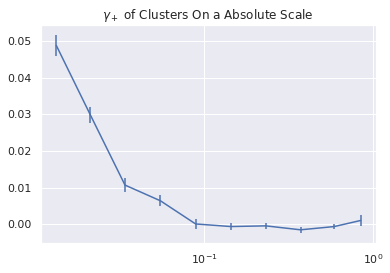

Aggregated xi:
[-73.0937 -93.1676 -52.732  -51.8436  -1.1475  13.3861  13.8363  62.5914
  25.0692 -10.5909]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -6477.6665 -12033.1955 -16694.5175 -23510.3034 -32329.5884 -41808.4271
 -46349.4061 -40976.7035 -21163.8956  -1719.5575]
------------------------------------------------------------------------------
Aggregated npairs:
[ 1498.  3117.  4930.  8102. 13351. 21547. 31680. 41424. 39996. 10239.]
------------------------------------------------------------------------------
Mean xi:
[-4.8794e-02 -2.9890e-02 -1.0696e-02 -6.3989e-03 -8.5947e-05  6.2125e-04
  4.3675e-04  1.5110e-03  6.2679e-04 -1.0344e-03]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3242 -3.8605 -3.3863 -2.9018 -2.4215 -1.9403 -1.463  -0.9892 -0.5292
 -0.1679]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

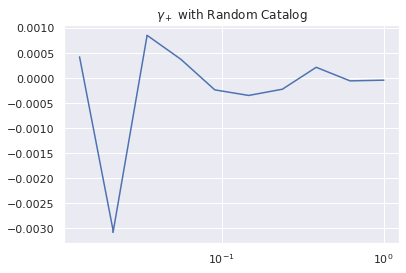

[ 4.3030e-04 -3.0562e-03  8.6036e-04  3.8116e-04 -2.2971e-04 -3.4155e-04
 -2.1683e-04  2.2134e-04 -5.0238e-05 -3.6069e-05]
[-3.9398e-06  2.7982e-05 -7.8774e-06 -3.4898e-06  2.1032e-06  3.1271e-06
  1.9852e-06 -2.0265e-06  4.5997e-07  3.3025e-07]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

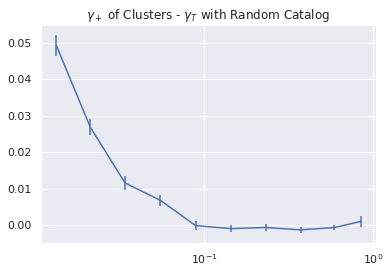

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

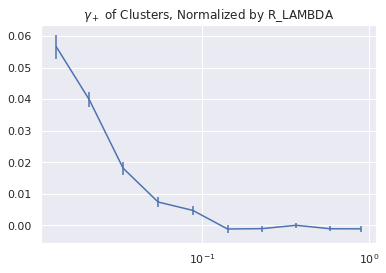

Aggregated xi:
[-46.2363 -90.6857 -71.7247 -47.0306 -49.0728  18.8682  26.3325  -2.167
  45.7     30.6568]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3519.3394  -8769.792  -13384.7841 -18378.3184 -24961.4007 -32954.0446
 -38588.52   -37138.2007 -23487.4273  -3280.1978]
------------------------------------------------------------------------------
Aggregated npairs:
[  816.  2273.  3946.  6318. 10276. 16888. 26131. 36988. 43936. 28575.]
------------------------------------------------------------------------------
Mean xi:
[-5.6662e-02 -3.9897e-02 -1.8177e-02 -7.4439e-03 -4.7755e-03  1.1173e-03
  1.0077e-03 -5.8587e-05  1.0401e-03  1.0729e-03]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3129 -3.8582 -3.392  -2.9089 -2.4291 -1.9513 -1.4767 -1.0041 -0.5346
 -0.1148]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)